## Импорт библиотек и датасета

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import missingno as msno

In [2]:
TRAIN_DATASET_PATH = '/kaggle/input/realestatepriceprediction/train.csv'

df_train = pd.read_csv(TRAIN_DATASET_PATH)

df_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


## Общая информация о датасете

In [3]:
df_train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [4]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


## Пропуски данных

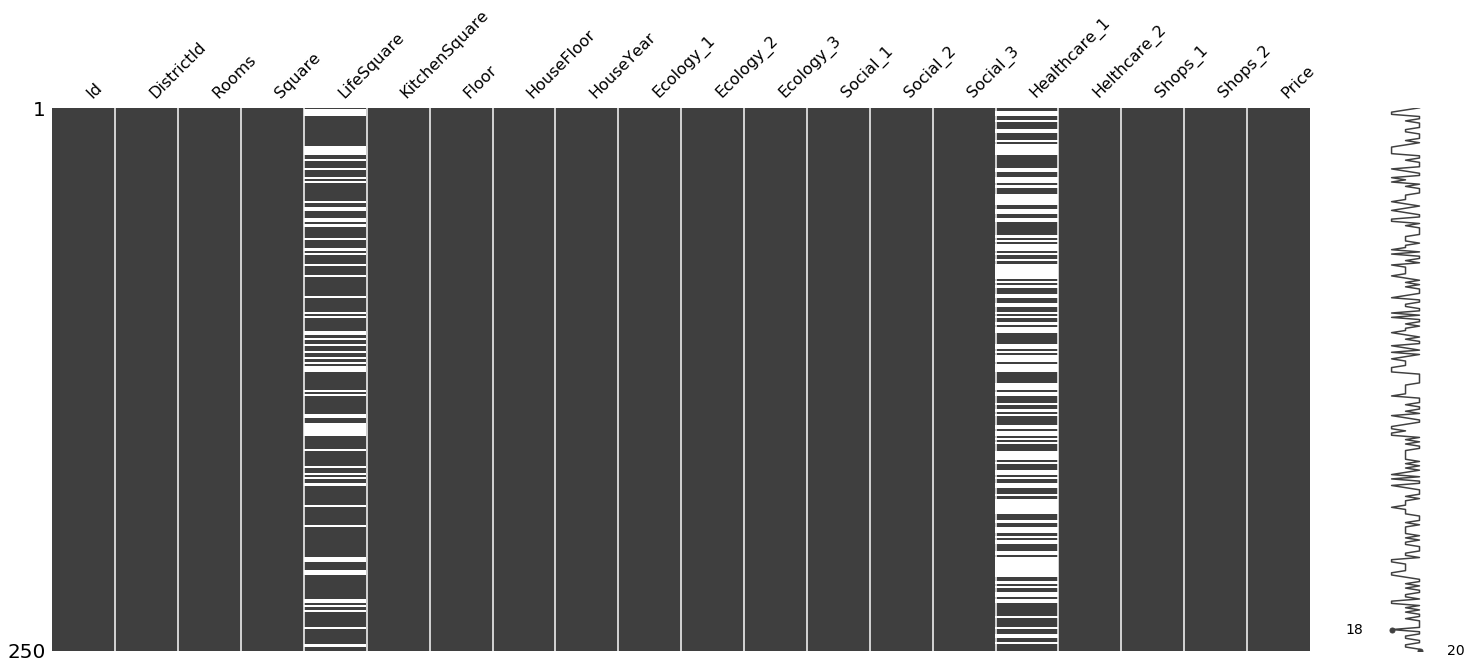

In [5]:
msno.matrix(df_train.sample(250));

Диаграмма позволяет наглядно увидеть пропуски. С помощью такой визуализации можно исследовать есть ли у пропусков закономерность: например, сортируя наблюдения по каждой из фичей, можно смотреть сгруппируются ли пропуски на диаграмме, что будет означать принадлежность пропусков какому-то конкретному классу.

In [6]:
total = df_train.isnull().sum().sort_values(ascending=False)
percentage = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Persent'])
missing_data.head()

,Total,Persent
Healthcare_1,4798,0.4798
LifeSquare,2113,0.2113
Price,0,0.0000
HouseYear,0,0.0000
DistrictId,0,0.0000


Самый простой вариант: удалить фичу *Healthcare_1*, оставить и отчистить фичу *LifeSquare*.

С другой стороны, фича *Healthcare_1* заполнена более чем на 50 процентов. Обычно порог при котором рекомендуется удалять полностью фичу - пропущено более 70 процентов. Мотивация простая: всегда, когда удаляется фича - теряется информация. Таким образом, можно постараться разумно заполнить пропуски и оставить фичу *Healthcare_1* в датасете.  

## Взаимосвязь фичей

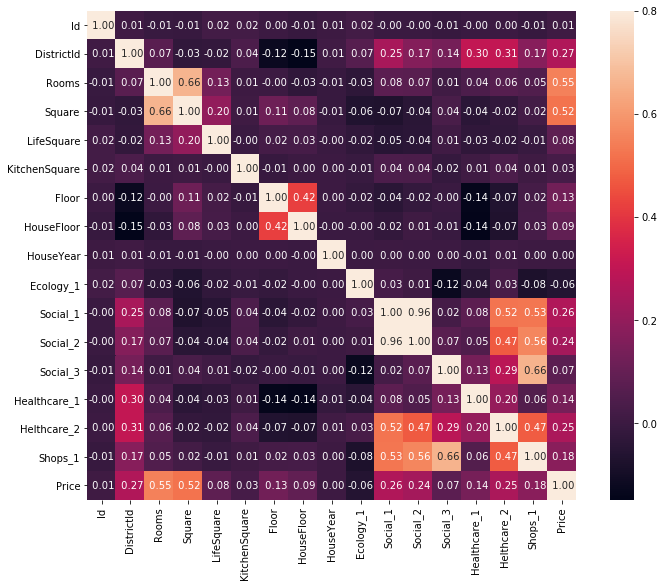

In [7]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot=True, fmt=' .2f', square=True);

На себя обращает внимание бело-розоватый квадрат: *Social_1* и *Social_2* практически линейно зависят друг от друга, а значит несут в себе одинаковую информацию. Можно удалить одну из этих фичей без потерь, например *Social_2*, так как она имеет меньшую корреляция с *Price*.

Также заметим, что цена не сильно коррелирует с фичами, за исключением, может быть, *Rooms* и *Square*. Означает ли это что линейные модели не покажут себя с хорошей стороны?

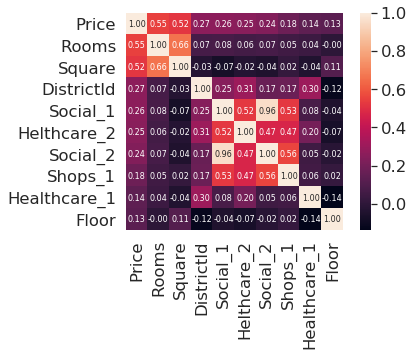

In [8]:
k = 10
cols = corrmat.nlargest(k, 'Price')['Price'].index
sns.set(font_scale=1.5)
hm = sns.heatmap(df_train[cols].corr(), annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values);

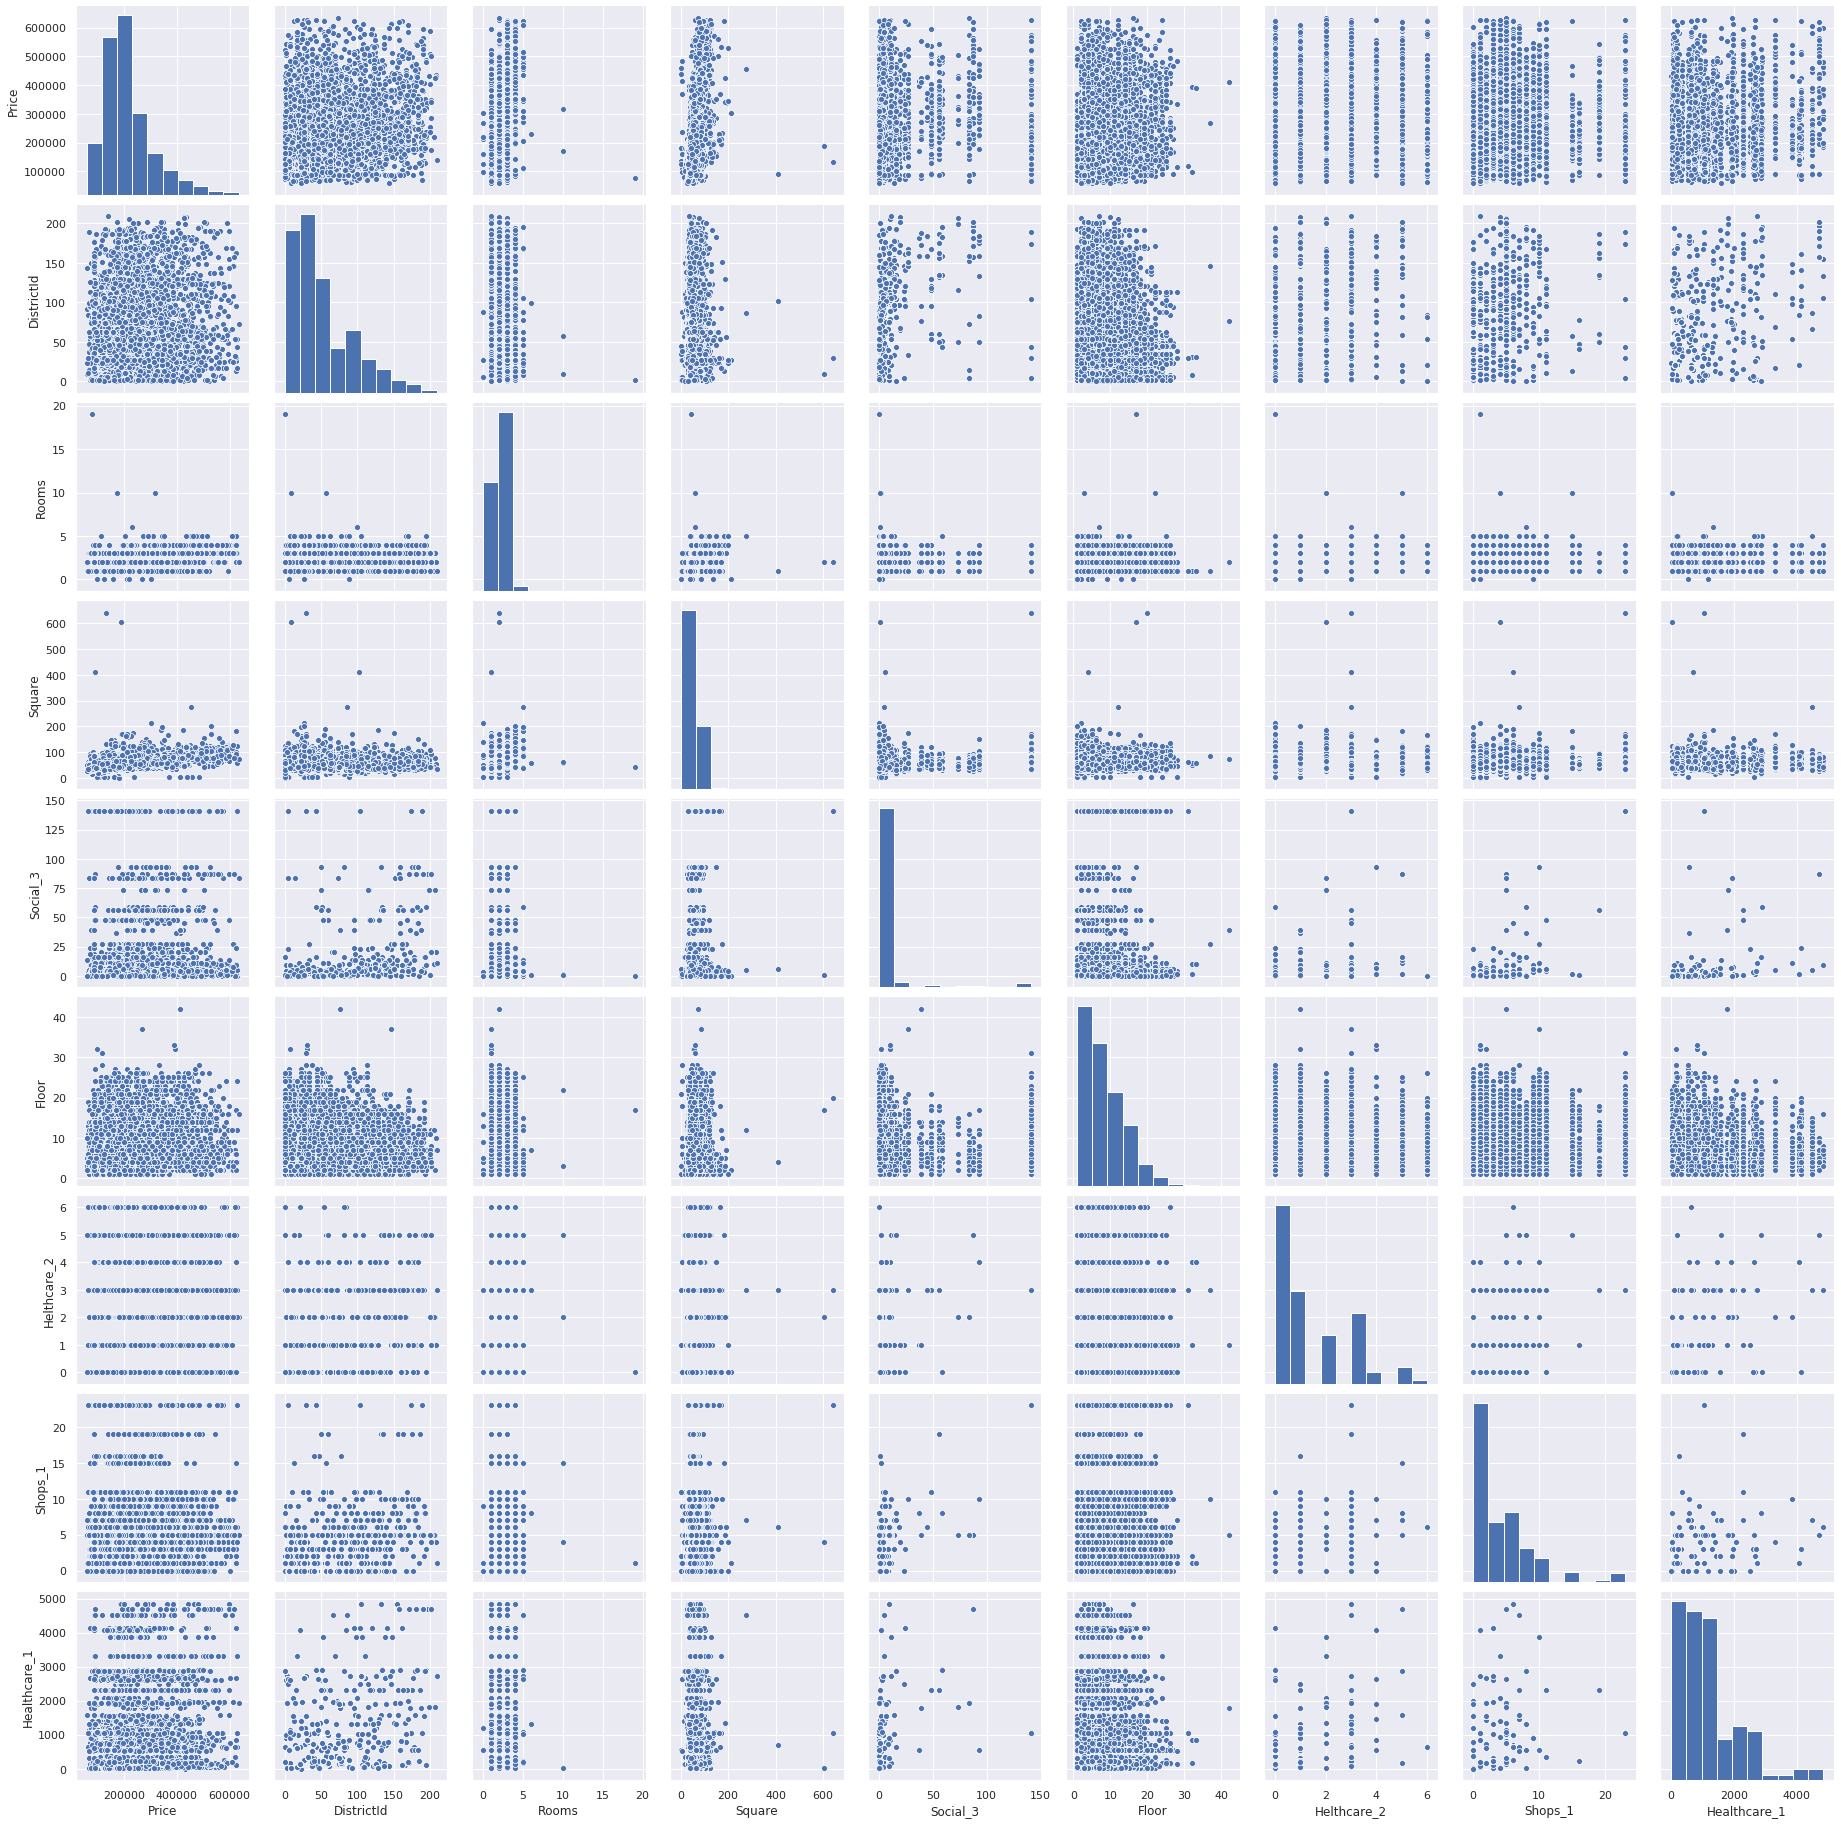

In [9]:
sns.set()
cols = ['Price','DistrictId', 'Rooms', 'Square', 'Social_3', 'Floor', 'Helthcare_2', 'Shops_1', 'Healthcare_1']
sns.pairplot(df_train[cols], size = 2.8)
plt.show()

Данный набор парных взаимосвязей фичей наглядно демострирует наличие выборосов фичей. Возникает вопрос: данные выбросы соответствуют ошибке в значении конретной фичи или некоторым нетипичным наблюдениям в целом? Если первое, то нужно их почистить, если второе то может быть полезно удалить такие наблюдения целиком.

Для ответа на этот вопрос создадим новую фичу *flag*, которая будет помечать выбросы отдельной фичи. Например, ниже реализована фича *flag*, значение которой равно 1, если количество комнат для данного наблюдения равно 0. 

Далее снова строится набор графиков парных взаимосвязей фичей, но точки у которых *flag* = 1 помечаются другим цветом. Таким образом можно увидеть являются ли эти точки выбросами во взаимосвязи других фичей.

In [10]:
cols = ['Price','DistrictId', 'Rooms', 'Square', 'LifeSquare', 'Social_1', 'Shops_1']
df_train_temp = pd.concat([df_train[cols], pd.Series(np.int8(df_train['Rooms'] == 0), name='flag')], axis=1)
df_train_temp.loc[df_train_temp['Rooms'] == 0]

,Price,DistrictId,Rooms,Square,LifeSquare,Social_1,Shops_1,flag
1397,268394.744389,27,0.0,138.427694,136.215499,11,0,1
1981,302211.260887,27,0.0,212.932361,211.231125,9,1,1
2269,98129.976788,27,0.0,41.790881,NaN,9,1,1
3911,217009.338463,28,0.0,49.483501,NaN,30,0,1
4366,212864.799112,6,0.0,81.491446,NaN,5,0,1
4853,126596.941798,27,0.0,2.377248,0.873147,2,0,1
6149,158998.110646,88,0.0,38.697117,19.345131,43,9,1
8834,219281.918007,27,0.0,87.762616,85.125471,9,1,1


Пример для выбросов типа *Rooms* = 0

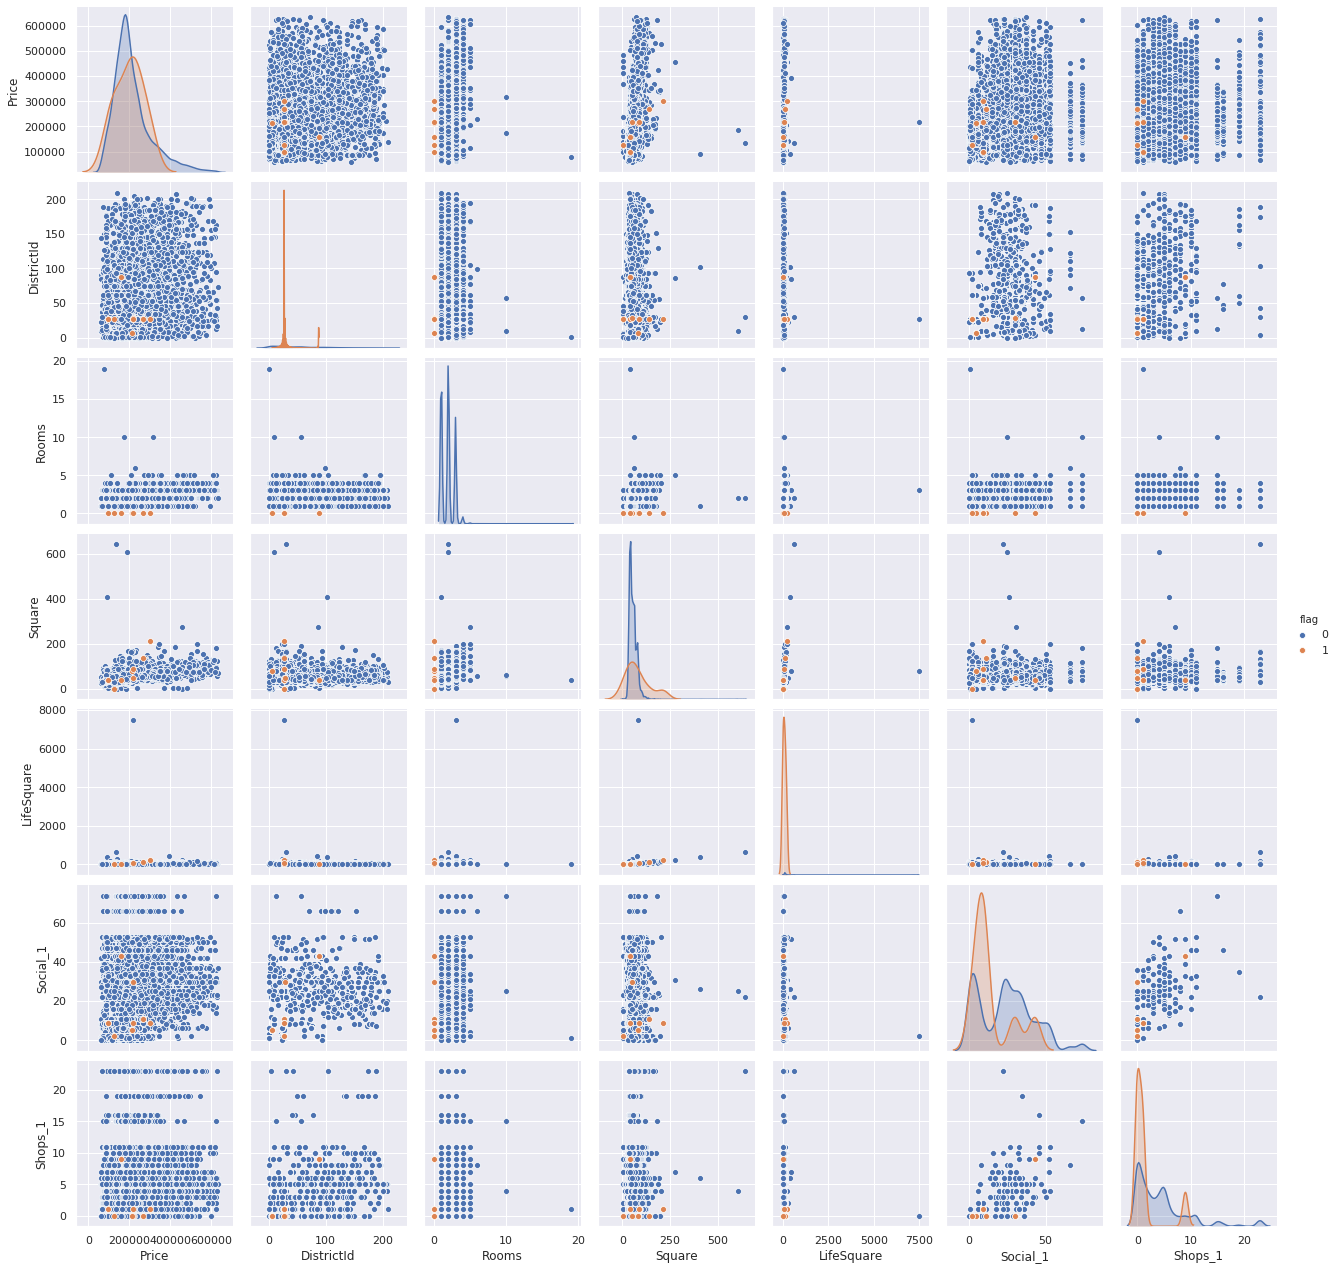

In [11]:
sns.pairplot(df_train_temp, size = 2.5, hue='flag')
plt.show()

## DistrictId

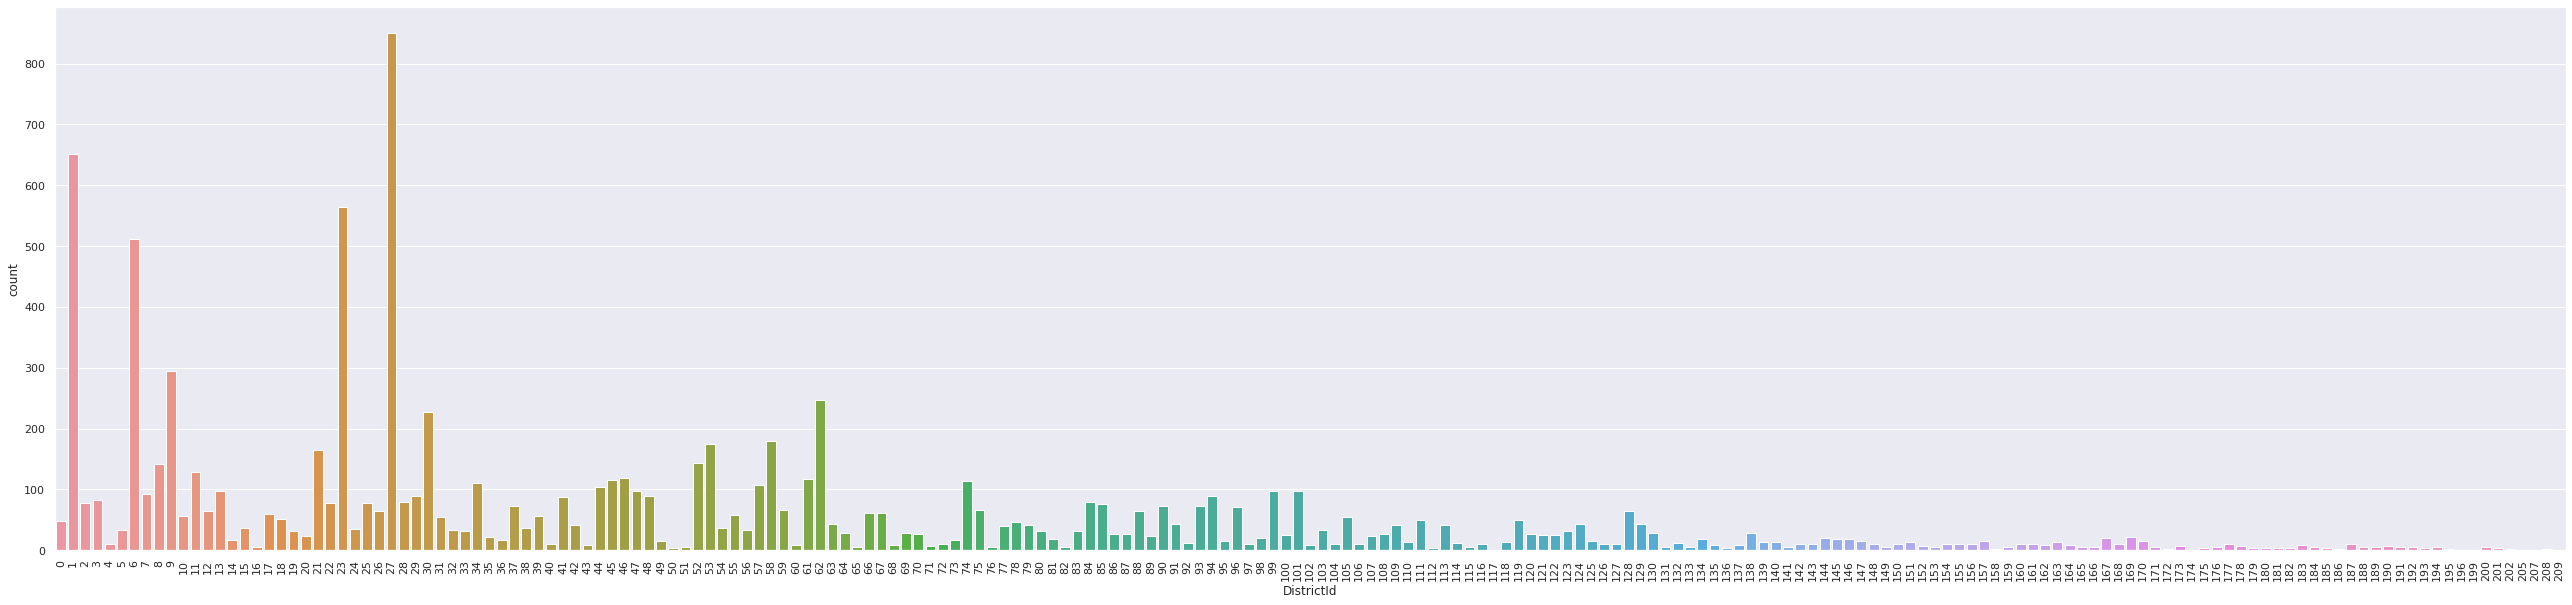

In [12]:
plt.figure(figsize = (45, 10))
sns.countplot(x = 'DistrictId', data = df_train)
xt = plt.xticks(rotation=90)

По данной диаграмме можно прикинуть валидность вычисления средних/медианных значений по районам. 

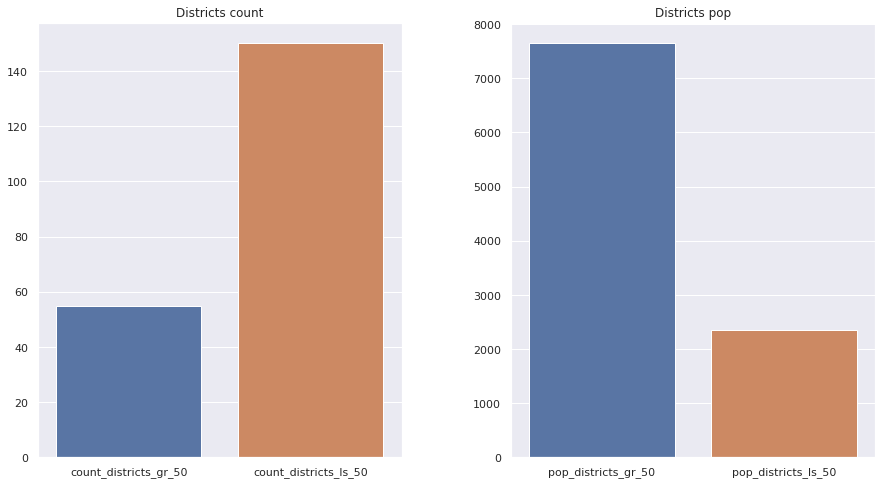

In [13]:
district = df_train['DistrictId'].value_counts()
district_gr_50 = district[district > 50]
district_ls_50 = district[district <= 50]
districts = {'count_districts_gr_50': district_gr_50.count(), 'count_districts_ls_50': district_ls_50.count()}
districts_2 = {'pop_districts_gr_50': district_gr_50.sum(), 'pop_districts_ls_50': district_ls_50.sum()}

fig, ax = plt.subplots(1, 2)

fig.set_size_inches(15, 8)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

#plt.figure(figsize=(12,8))    
ax[0].set_title('Districts count')
sns.barplot(list(districts.keys()), list(districts.values()), ax=ax[0])

ax[1].set_title('Districts pop')
sns.barplot(list(districts_2.keys()), list(districts_2.values()), ax=ax[1])

plt.show()

Более 140 районов не имеют достаточного "населения" для расчета средних характеристик. Если в тестовом датасете будет большое представительство этих районов, то фичи построенные на таких усреднениях могут плохо себя показать (особенно фичи, построенные на target encoding). 

Идея: можно решить задачу классификации для наблюдений из районов с низким "населением" - отнести каждое такое наблюдение к району с достаточным населением на основе других фич.

## Sqaure

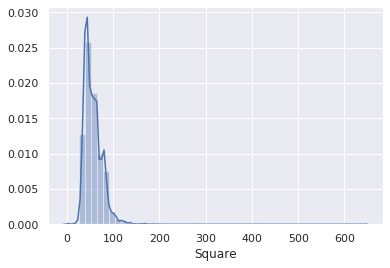

In [14]:
sns.distplot(df_train['Square']);

Уберем выбросы справа, чтобы лучше рассмотреть распределение

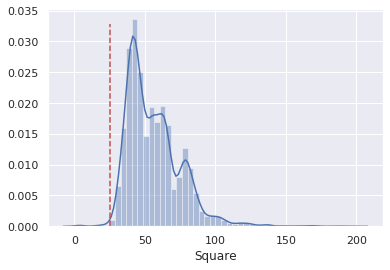

In [15]:
sns.distplot(df_train.loc[df_train['Square'] < 200,'Square'])
plt.plot([25 for x in range(330)], [x/10000 for x in range(330)], ls='--', c='r')
plt.show()

In [16]:
df_train.loc[df_train['Square'] < 25, 'Square'].count()

34

## Rooms
Для наблюдений у которых количетсво комнат больше 5 можно посмотреть какие *Square*, *KitchenSquare*, *Price* им соответствуют, для оценки адекватности данных значений. 

In [17]:
df_train.loc[df_train['Rooms'] > 5, ['DistrictId', 'Square', 'KitchenSquare', 'Rooms', 'Price']]

,DistrictId,Square,KitchenSquare,Rooms,Price
377,57,59.056975,10.0,10.0,317265.323792
1454,1,42.006046,7.0,19.0,78364.616704
2170,99,59.414334,6.0,6.0,229661.964416
8849,9,60.871266,10.0,10.0,172329.270863


Тоже самое для *Rooms* = 0. Учитывая какие площади соответствуют таким наблюдениям, можно разработать стратегию их заполнения. 

In [18]:
df_train.loc[df_train['Rooms'] == 0, ['DistrictId', 'Square', 'KitchenSquare', 'Rooms', 'Price']]

,DistrictId,Square,KitchenSquare,Rooms,Price
1397,27,138.427694,0.0,0.0,268394.744389
1981,27,212.932361,0.0,0.0,302211.260887
2269,27,41.790881,0.0,0.0,98129.976788
3911,28,49.483501,0.0,0.0,217009.338463
4366,6,81.491446,0.0,0.0,212864.799112
4853,27,2.377248,0.0,0.0,126596.941798
6149,88,38.697117,9.0,0.0,158998.110646
8834,27,87.762616,0.0,0.0,219281.918007


## KitchenSquare

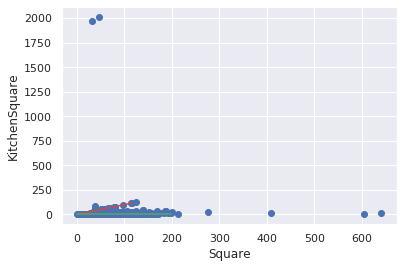

In [19]:
plt.scatter(df_train['Square'], df_train['KitchenSquare'])
plt.plot([x for x in range(120)], [y for y in range(120)], c = 'r')
plt.plot([y for y in range(200)], [ 0 for x in range(200)], c = 'g')
plt.xlabel('Square')
plt.ylabel('KitchenSquare')
plt.show()

Уберем выбросы *Square*, чтобы рассмотреть взаимосвязь подробнее

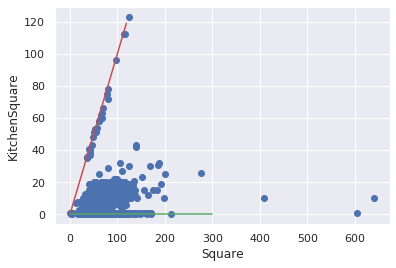

In [20]:
cond = df_train['KitchenSquare'] < df_train['Square'] + 0.5*df_train['Square'].std()
plt.scatter(df_train.loc[cond, 'Square'], df_train.loc[cond, 'KitchenSquare'])
plt.plot([x for x in range(120)], [y for y in range(120)], c = 'r')
plt.plot([y for y in range(300)], [ 0 for x in range(300)], c = 'g')
plt.xlabel('Square')
plt.ylabel('KitchenSquare')
plt.show()

Можно заметить набор точек, у которых *KitchenSquare* практически равно *Square*. Учитывая, что это значения примерно от 30 квадратных метрои и выше, можно предположить, что фича *KitchenSquare* в данном случае заполнена ошибочно.

Также есть точки, у которых *KitchenSquare* = 0, некоторым из которых соответствуют очень маленькие значения *Square*. Возможно, с ними тоже нужно поработать.

Уберем все подозрительные точки и снова построим график.

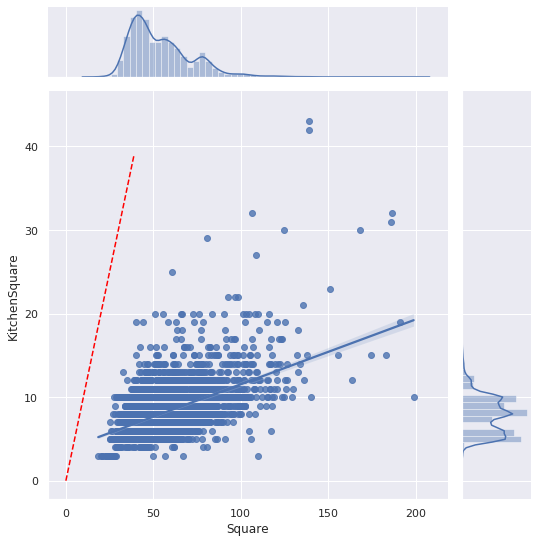

In [21]:
cond = (df_train['KitchenSquare'] >= 3) & (abs(df_train['Square'] - df_train['KitchenSquare']) > 10) &\
                    (df_train['KitchenSquare'] < 50) &  (df_train['Square'] < 200)
temp = df_train.loc[cond, ['Square', 'KitchenSquare']]
grid = sns.jointplot(temp['Square'], temp['KitchenSquare'], kind='reg')
plt.plot(np.arange(0, 40), np.arange(0, 40), color = 'red', linestyle='--')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

## LifeSquare

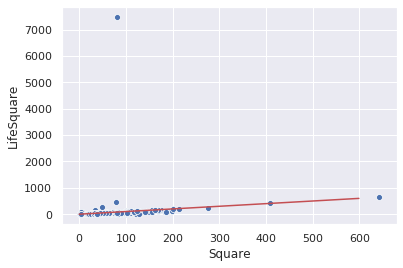

In [22]:
cond = ~df_train['LifeSquare'].isna()
plt.plot([x for x in range(600)], [y for y in range(600)], c = 'r')
sns.scatterplot(df_train.loc[cond, 'Square'], df_train.loc[cond, 'LifeSquare']);

Уберем очевидные выбросы, чтобы лучше рассмотреть данные

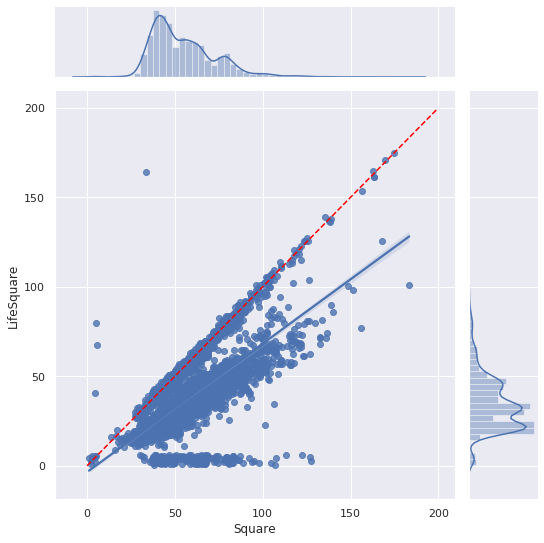

In [23]:
cond = (~df_train['LifeSquare'].isna()) & (df_train['LifeSquare'] < df_train['LifeSquare'].quantile(q = 0.999)) & \
                                        (df_train['Square'] < df_train['Square'].quantile(q = 0.999))
grid = sns.jointplot(df_train.loc[cond, 'Square'], df_train.loc[cond, 'LifeSquare'], kind='reg')
plt.plot(np.arange(0, 200), np.arange(0, 200), color = 'red', linestyle='--')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

Хорошо видны выбросы. Для остальных значений можно заметить линейную зависимость. Этот факт может быть использован при заполнении пропусков и чистки фичи *LifeSquare*.

## YearBuilt

In [24]:
df_train['HouseYear'].unique()

array([    1969,     1978,     1968,     1977,     1976,     2011,
           1960,     2014,     1973,     1959,     1999,     1980,
           1979,     1983,     2001,     2012,     2002,     1996,
           1964,     2018,     1972,     1965,     1984,     1961,
           1971,     1963,     2017,     1970,     1981,     2003,
           2016,     1991,     1975,     2006,     2009,     1985,
           1974,     1994,     2000,     1987,     1998,     2005,
           1990,     1982,     1997,     2015,     2008,     2010,
           2004,     2007,     1967,     1957,     1962,     1993,
           1966,     1955,     1937,     1992,     1954,     1995,
           2019,     1948,     1986,     2013,     1989,     1958,
           1938,     1956,     1988,     2020,     1951,     1952,
           1935,     1914,     1932,     1950,     1917,     1918,
           1940, 20052011,     1942,     1939,     1934,     1931,
           1919,     1912,     1953,     1936,     1947,     1

In [25]:
df_train.loc[(df_train['HouseYear'] == 20052011) | (df_train['HouseYear'] == 4968), 'HouseYear'].value_counts()

20052011    1
4968        1
Name: HouseYear, dtype: int64

Только 2 ошибочных значения. Для тренировочного датасета можно их заменить и вручную (хотя автоматизированные проверки на адекватность типа year < current_year все равно нужны при обработке тестового датасета).

## Floor & HouseFLoor

In [26]:
colors = ['g' if i == 0.0 else 'b' for i in df_train.loc[df_train['HouseFloor'] < 60, 'HouseFloor']]
colors.count('g')

269

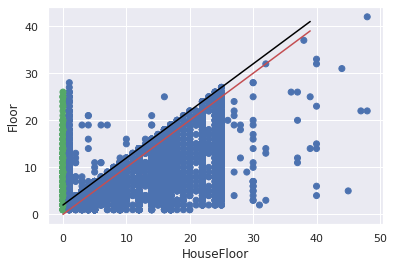

In [27]:

plt.scatter(df_train.loc[df_train['HouseFloor'] < 60, 'HouseFloor'], df_train.loc[df_train['HouseFloor'] < 60, 'Floor'], c=colors)

plt.plot([x for x in range(40)], [y for y in range(40)], c = 'r')
plt.plot([x for x in range(40)], [y + 2 for y in range(40)], c = 'black')
plt.xlabel('HouseFloor')
plt.ylabel('Floor')
plt.show()

Можно заметить, что основной массив значений *Floor* находится в пределах *HouseFlooe* + 2, а не *HouseFlooe*, как можно было ожидать. Возможно, нумерация этажей не соответствует фактической (например, реально жилые этажи начинаются с 3-его, на 1 и 2 магазины, а нумерация этажей начинается с 1).

## Healthcare_1
Если мы все таки решили сохранить Healthcare_1, то вот какая идея по заполнению приходит в голову:

Так это метрика связанная с здравоохранением, то, возможно, она должна не сильно меняться внутри одного района. Если это так, то можно посчитать медианные значения Healthcare_1 в каждом районе, где есть данные и использовать их для заполнения.

Можно проверить эту гипотезу:

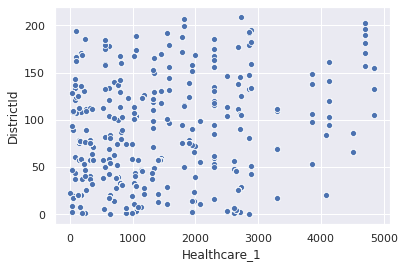

In [28]:
sns.scatterplot(df_train.loc[~df_train['Healthcare_1'].isna(), 'Healthcare_1'], df_train.loc[~df_train['Healthcare_1'].isna(), 'DistrictId']);

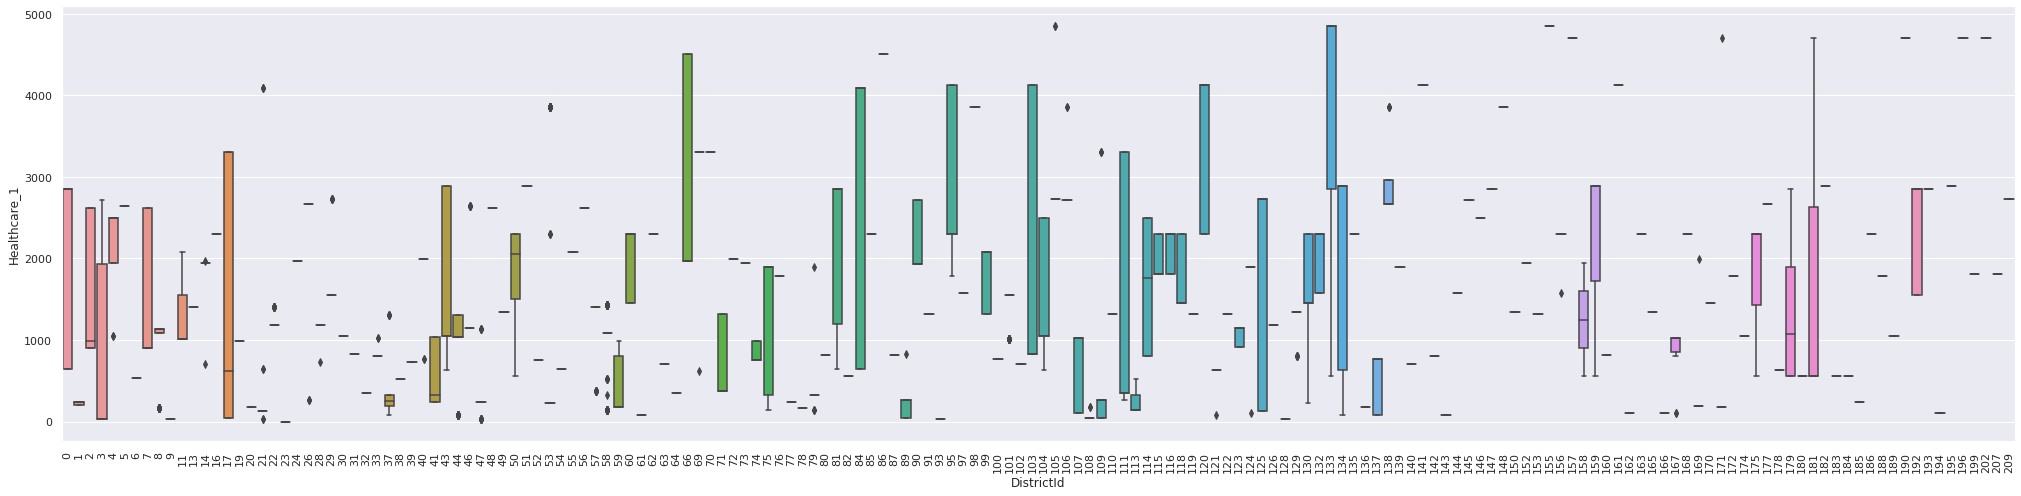

In [29]:
plt.figure(figsize=(35, 8))
cond = ~df_train['Healthcare_1'].isna()

s = sns.boxplot(df_train.loc[cond, 'DistrictId'], df_train.loc[cond, 'Healthcare_1'])
s.set_xticklabels(s.get_xticklabels(), rotation=90)

plt.xlabel('DistrictId')
plt.ylabel('Healthcare_1')
plt.show()

Похоже, гипотеза не подтвердилась.

## Price

In [30]:
df_train['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

In [31]:
print("Skewness: %f" % df_train['Price'].skew())
print("Kurtosis: %f" % df_train['Price'].kurt())

Skewness: 1.366878
Kurtosis: 2.249410


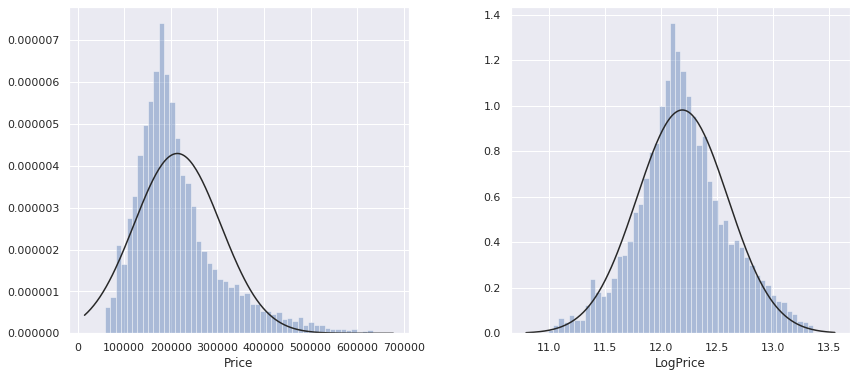

In [32]:
y = df_train['Price']

fig, ax = plt.subplots(1, 2)

fig.set_size_inches(14, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

sns.distplot(y, kde=False, fit=st.norm, ax=ax[0])

sns.distplot(pd.Series(np.log(y), name ='LogPrice'), kde=False, fit=st.norm, ax=ax[1])

plt.show()

Изначально хорошей апроксимацией *Price* является распределение Джонсона. Учитывая это, может быть полезно преобразовать данные к нормальному распределению перед обучением модели.

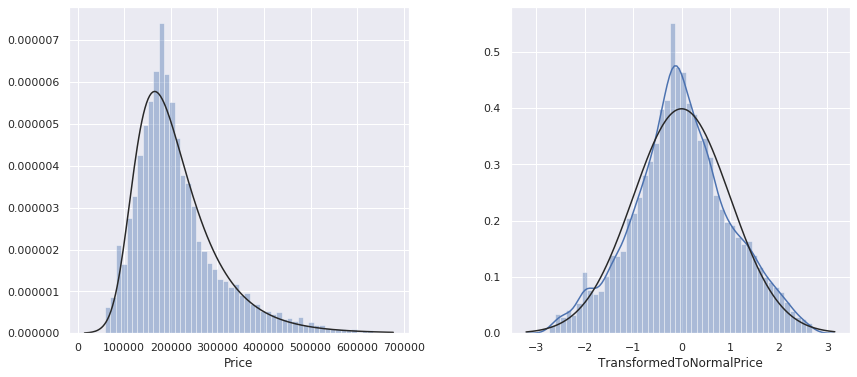

In [33]:
y = df_train['Price']

fig, ax = plt.subplots(1, 2)

fig.set_size_inches(14, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

sns.distplot(y, kde=False, fit=st.johnsonsu, ax=ax[0])

# Преобразуем массив цены к нормальному распределению
params = st.johnsonsu.fit(y)
t = (y-params[2])/params[3]
y_norm = params[0] + params[1]*np.log(t + np.sqrt(np.power(t, 2) + 1))

sns.distplot(pd.Series(y_norm, name ='TransformedToNormalPrice'), fit=st.norm, ax=ax[1])

plt.show()

 

После предсказания ответа необходимо выполнить обратное преобразование. Как это сделать (для примера на тех же данных):

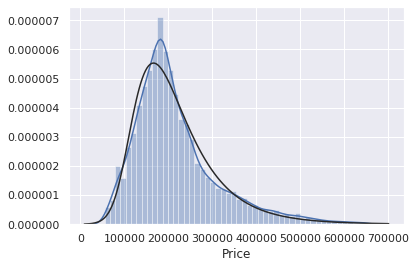

In [34]:
y_back_to_Johnson = params[2]*np.sinh((y_norm - params[0])/params[1]) + params[3]

sns.distplot(y_back_to_Johnson, fit=st.johnsonsu)

plt.show()